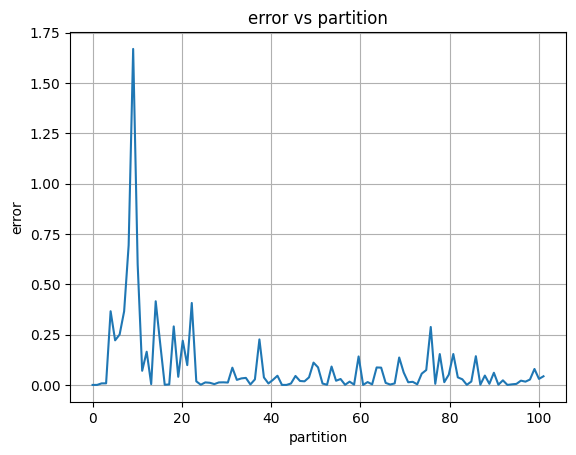

In [1]:
#this is the simulation using a linear scale when increasing the partition (much slower and less useful to study the convergence)
import numpy as np
import matplotlib.pyplot as plt

finest_part=101
error=np.linspace(0,0,finest_part)
simulation=np.linspace(0,finest_part,finest_part)
T=1
for N in range (2,finest_part):
    time=np.linspace(0,T,N)
    W=np.linspace(0,0,N)
    W_T=0
    for i in range (N-1):
        W[i+1]=W[i]+np.random.normal(0, np.sqrt(1/(N-1)))
        W_T=W_T+(W[i+1]-W[i])**2
    error[N]=(T-W_T)**2                             #the error estimator is (W_[T]-T)^2

#plotting the error VS the partion
plt.plot(simulation, error)  
plt.xlabel('partition')
plt.ylabel('error')
plt.title('error vs partition')
plt.grid(True)
plt.show()

    

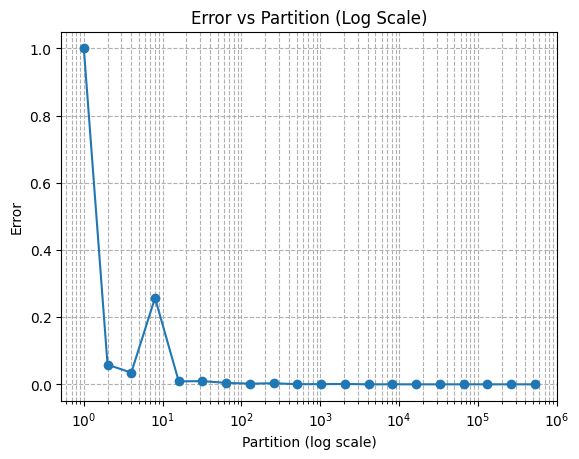

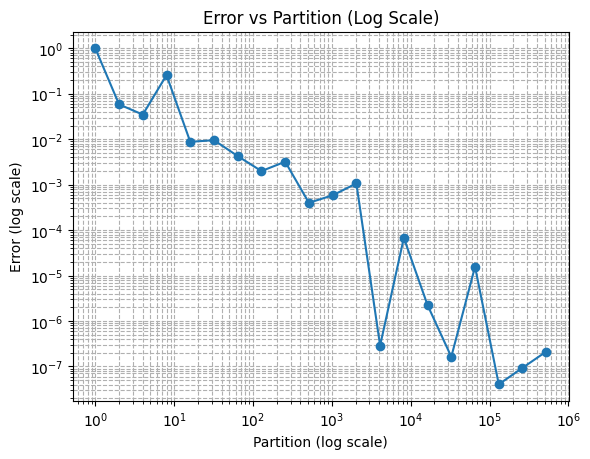

In [30]:
#logaritmic scale simulation 
import numpy as np
import matplotlib.pyplot as plt

n_tot=20         #total number of simulations
T=1
simulation=[]
error=[]
for i in range(n_tot):
    simulation.append(2**i)

for N in simulation:
    time=np.linspace(0,T,N)
    W=np.linspace(0,0,N)
    W_T=0
    for i in range (N-1):
        W[i+1]=W[i]+np.random.normal(0, np.sqrt(1/(N-1)))
        W_T=W_T+(W[i+1]-W[i])**2
    error.append((T-W_T)**2)

# Plotting the error VS partition with logarithmic scale
plt.plot(simulation, error, marker='o')
plt.xscale('log')
plt.xlabel('Partition (log scale)')
plt.ylabel('Error')
plt.title('Error vs Partition (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()

# Plotting the error VS partition with logarithmic scale on both axis
plt.plot(simulation, error, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Partition (log scale)')
plt.ylabel('Error (log scale)')
plt.title('Error vs Partition (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()


    

In [2]:
#By looking at the second plot we can see that log(error) \sim -log(N) where N is the number of points of the partition, thus error \sim 1/N more or less

KeyboardInterrupt: 

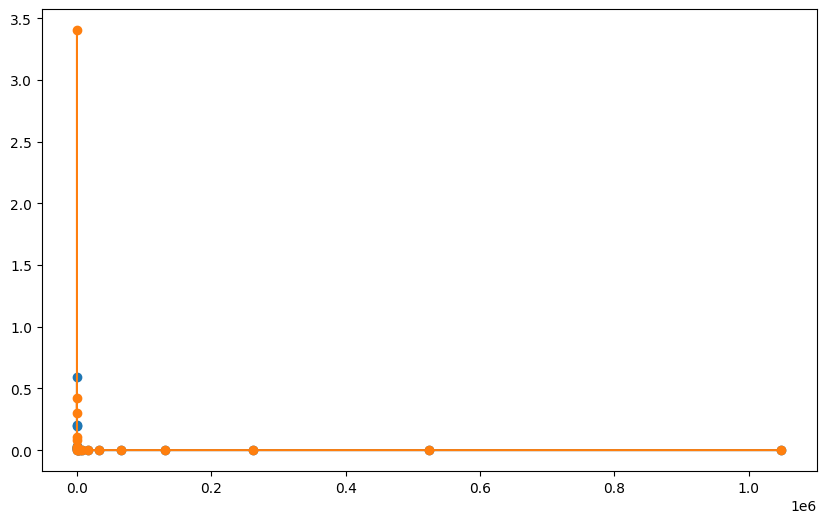

In [4]:
#considering the partition with exponential increment and averaging over different samples of W_t
import numpy as np
import matplotlib.pyplot as plt

def brownian_matrix(M,N,T):                # function that defines the M Brownian trajectories
    W = np.zeros((M,N), dtype='float')
    for i in range(M):
        for j in range(N-1):
            W[i,j+1]=W[i,j]+np.random.normal(0,np.sqrt(T/(N-1)))
    return W

n=20                                        # number of considered partitions
simulation=[2**(i+1)for i in range(n)]      # exponential increment of partitions
T=1                                         # setting time T

# Different values of M for comparison
M_values=[2,10,100]

plt.figure(figsize=(10,6))

for M in M_values:
    error=[]
    for N in simulation:                      # for each partition size
        W = brownian_matrix(M, N, T)
        estimator = []
        for i in range(M):
            sum = 0
            for j in range(N - 1):
                sum=sum+(W[i,j+1]-W[i,j])**2
            estimator.append((T-sum)**2)
        
        error.append(np.average(estimator))                   # average error for each partition size

    # Plot each M on the same graph with a label
    plt.plot(simulation, error, marker='o', label=f'M = {M}')   #adding to the plot 

# Final plot settings
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Partition (log scale)')
plt.ylabel('Error (log scale)')
plt.title('Error vs Partition (Log Scale) for Different M Values')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
